In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
# Defining funcitons at first before use

In [3]:
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('R2-score: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [4]:
R2_train = []
R2_test = []

def car_pred_model(model, X_train, X_test, y_train, y_test):
    # Training model
    model = model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    

    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    ax[0].set_ylabel('Residuals')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()
    regression_results(y_train, y_pred_train)


In [5]:
dataset_model1 = pd.read_csv("vehicle_data.csv")

In [6]:
pd.set_option('display.max_rows', 500)

In [7]:
dataset_model1.shape


(301, 9)

In [8]:
dataset_model1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
dataset_model1.isna().count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
dtype: int64

In [10]:
dataset_model1['Age'] = 2021 - dataset_model1['Year']
dataset_model1.drop('Year',axis=1,inplace = True)

In [11]:
dataset_model1.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Num_PrevOwners'},inplace = True)

In [12]:
dataset_model1.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Num_PrevOwners', 'Age'],
      dtype='object')

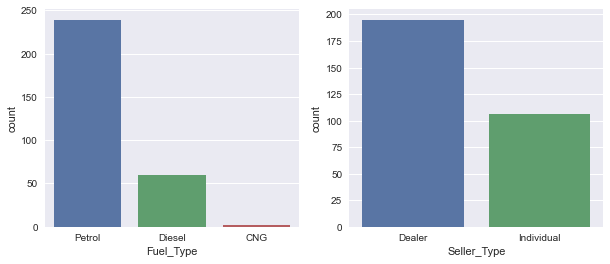

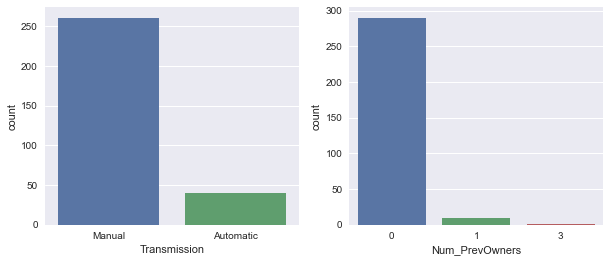

In [13]:
categorical_columns = ['Fuel_Type','Seller_Type','Transmission','Num_PrevOwners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    
    plt.subplot(1,2,1)
    sns.countplot(x=categorical_columns[i], data=dataset_model1)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=categorical_columns[i], data=dataset_model1)
    i += 1
    
    plt.show()

In [14]:
dataset_model1.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'],axis= 1, inplace = True)

In [15]:
# Separating target variable and its features
X1 = dataset_model1.drop('Selling_Price(lacs)',axis=1)
y1 = dataset_model1['Selling_Price(lacs)']

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
print("X train model1: ",X1_train.shape)
print("X test model1: ",X1_test.shape)
print("y train model1: ",y1_train.shape)
print("y test model1: ",y1_test.shape)

X train model1:  (240, 4)
X test model1:  (61, 4)
y train model1:  (240,)
y test model1:  (61,)


Train R2-score : 0.85
Test R2-score : 0.85


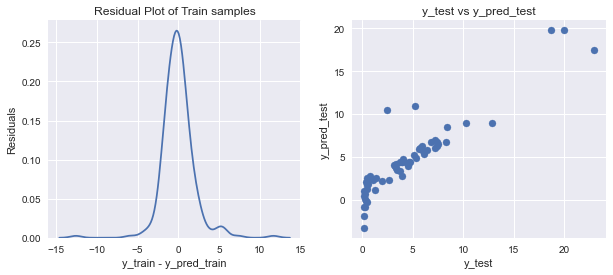

R2-score:  0.848
MAE:  1.3035
MSE:  4.0684
RMSE:  2.017


In [17]:
lm1 = LinearRegression()
car_pred_model(lm1, X1_train, X1_test, y1_train, y1_test)

In [18]:
dataset_model2 = pd.read_csv("vehicle_data.csv")

In [19]:
dataset_model2['Age'] = 2021 - dataset_model2['Year']
dataset_model2.drop('Year', axis=1, inplace = True)
dataset_model2.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Num_PrevOwners'},inplace = True)

In [20]:
dataset_model2.drop(labels='Car_Name',axis= 1, inplace = True)

In [21]:
dataset_model2 = pd.get_dummies(data = dataset_model2,drop_first=True) 

In [22]:
# Separating target variable and its features
y2 = dataset_model2['Selling_Price(lacs)']
X2 = dataset_model2.drop('Selling_Price(lacs)',axis=1)

In [23]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)
print("X train model2: ", X2_train.shape)
print("X test model2: ", X2_test.shape)
print("y train model2: ", y2_train.shape)
print("y test model2: ", y2_test.shape)

X train model2:  (240, 8)
X test model2:  (61, 8)
y train model2:  (240,)
y test model2:  (61,)


Train R2-score : 0.88
Test R2-score : 0.86


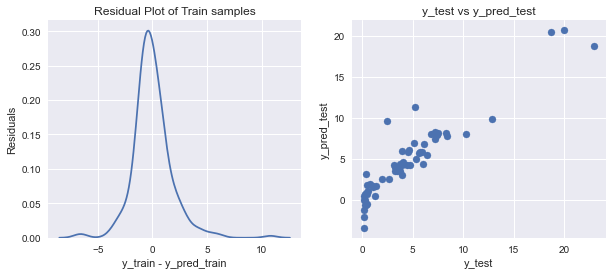

R2-score:  0.8823
MAE:  1.2072
MSE:  3.1519
RMSE:  1.7754


In [24]:
lm2 = LinearRegression()
car_pred_model(lm2, X2_train, X2_test, y2_train, y2_test)

In [25]:
#-------------------------------------------------Using OLS on Model1-----------------------------------------------------------

In [26]:
X1 = np.append(arr=np.ones((301, 1)).astype(int), values = X1, axis = 1)

In [27]:
X1_opt = X1[:, [0,1,2,3,4]]
X1_opt = np.array(X1_opt, dtype=float)
regressor_OLS = sm.OLS(y1, X1_opt).fit()
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.852
Model:                             OLS   Adj. R-squared:                  0.850
Method:                  Least Squares   F-statistic:                     426.6
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          1.66e-121
Time:                         03:55:12   Log-Likelihood:                -628.25
No. Observations:                  301   AIC:                             1267.
Df Residuals:                      296   BIC:                             1285.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1753      0.332     12.56

In [28]:
X1_opt = X1[:, [0,1,3,4]]
X1_opt = np.array(X1_opt, dtype=float)
regressor_OLS = sm.OLS(y1, X1_opt).fit()
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.852
Model:                             OLS   Adj. R-squared:                  0.851
Method:                  Least Squares   F-statistic:                     570.5
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          6.81e-123
Time:                         03:55:12   Log-Likelihood:                -628.32
No. Observations:                  301   AIC:                             1265.
Df Residuals:                      297   BIC:                             1279.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2011      0.324     12.96

In [ ]:
#-------------------------------------------------Using OLS on Model2-----------------------------------------------------------

In [29]:
X2 = np.append(arr=np.ones((301, 1)).astype(int), values = X2, axis = 1)

In [30]:
X2_opt = X2[:, [0,1,2,3,4,5,6,7,8]]
X2_opt = np.array(X2_opt, dtype=float)
regressor_OLS = sm.OLS(y2, X2_opt).fit()
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.883
Model:                             OLS   Adj. R-squared:                  0.879
Method:                  Least Squares   F-statistic:                     274.3
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          5.71e-131
Time:                         03:55:12   Log-Likelihood:                -593.62
No. Observations:                  301   AIC:                             1205.
Df Residuals:                      292   BIC:                             1239.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1882      1.330      3.90

In [34]:
X2_opt = X2[:, [0,1,2,3,4,5,7,8]]
X2_opt = np.array(X2_opt, dtype=float)
regressor_OLS = sm.OLS(y2, X2_opt).fit()
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.882
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                     314.3
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          3.49e-132
Time:                         03:56:08   Log-Likelihood:                -593.74
No. Observations:                  301   AIC:                             1203.
Df Residuals:                      293   BIC:                             1233.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7911      0.456     12.69

In [35]:
X2_opt = X2[:, [0,1,2,4,5,6,7,8]]
X2_opt = np.array(X2_opt, dtype=float)
regressor_OLS = sm.OLS(y2, X2_opt).fit()
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.882
Model:                             OLS   Adj. R-squared:                  0.879
Method:                  Least Squares   F-statistic:                     311.5
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          1.10e-131
Time:                         03:56:35   Log-Likelihood:                -594.93
No. Observations:                  301   AIC:                             1206.
Df Residuals:                      293   BIC:                             1236.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2595      1.333      3.94

In [31]:
#-----------------------------------------------Gradient Descent on Model1------------------------------------------------------

In [32]:
scaler = preprocessing.StandardScaler().fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test=scaler.transform(X1_test)

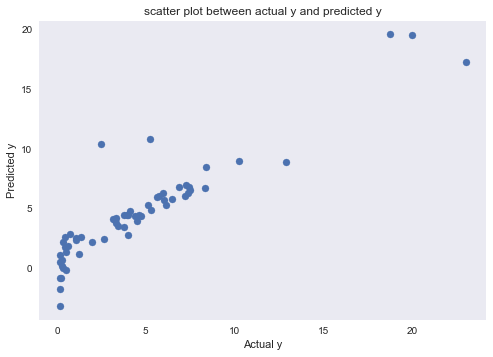

Mean Squared Error : 3.2803637621173243
Mean Absolute Error : 1.1137568826268676


In [33]:
# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(X1_train, y1_train)
plt.scatter(y1_test,clf_.predict(X1_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y1_test, clf_.predict(X1_test)))
print('Mean Absolute Error :',mean_absolute_error(y1_test, clf_.predict(X1_test)))
